**DATA** **PREPROCESSING** : Data preprocessing is the process of cleaning and transforming raw data into a structured format suitable for machine learning. Real-world data often contains missing values, duplicates, and inconsistencies that can negatively affect model performance. Preprocessing addresses these issues by handling missing data, removing duplicates, encoding categorical variables, and scaling numerical features. It also involves splitting the dataset into training and test sets for proper evaluation. These steps enhance data quality, reduce bias, and help models learn patterns more effectively. By laying a solid foundation, preprocessing ensures that machine learning algorithms can deliver accurate and reliable predictions from complex data.

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('heart.csv')

# Check for missing values
print(df.isnull().sum())

# Handle missing values (if any) and duplicates
df.drop_duplicates(inplace=True)

# Basic info and summary
print(df.info())
print(df.describe())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB
None
          

## **2. Exploratory Data Analysis (EDA)**

**Exploratory Data Analysis (EDA)** is the process of examining and visualizing data to understand its patterns, relationships, and underlying structure. It helps identify trends, detect outliers, and reveal correlations between features. EDA involves generating statistical summaries, plotting distributions, and using visual tools like histograms, box plots, and heatmaps. These insights guide data preprocessing and feature engineering, helping to address issues like data imbalance or multicollinearity. By exploring the dataset from multiple angles, EDA provides valuable context, allowing data scientists to make informed decisions and build more accurate, reliable machine learning models

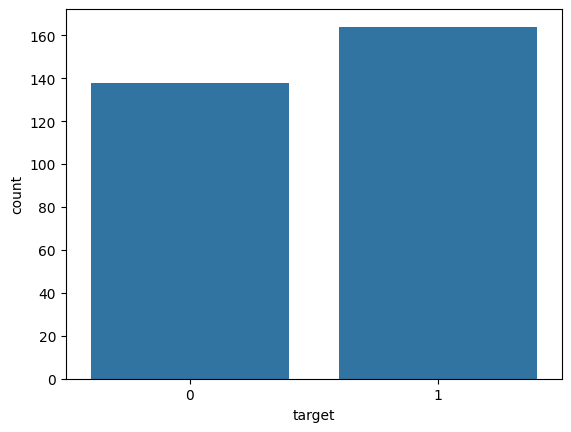

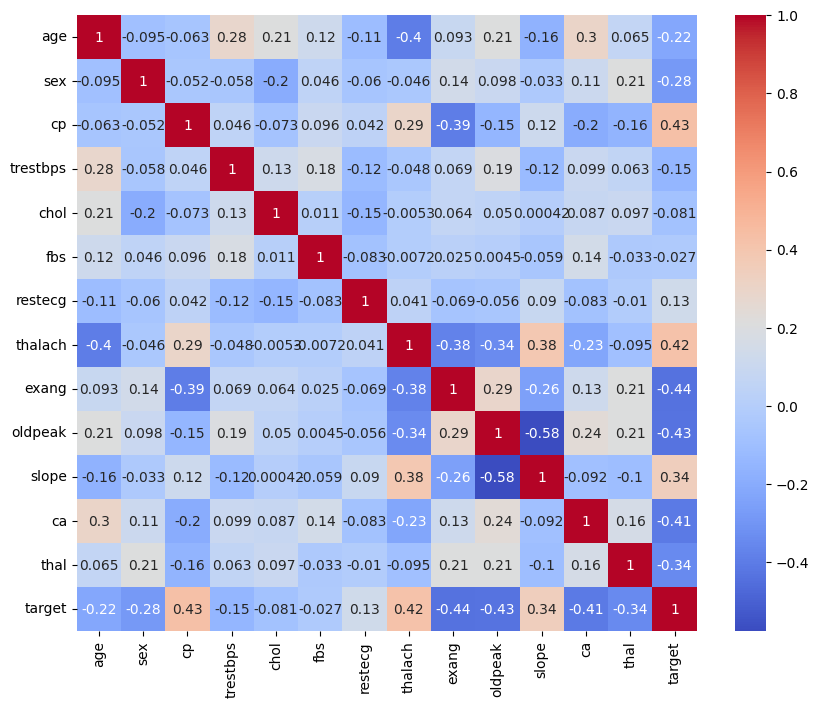

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize target distribution
sns.countplot(x='target', data=df)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


##**3.Feature Engineering** :
The process of creating, transforming, or selecting features to improve a machine learning model’s performance. It involves extracting useful information from raw data, generating new features, and converting existing ones to better represent the underlying patterns. Techniques include encoding categorical variables, scaling numerical data, creating interaction terms, and handling date or text features. The goal is to enhance the dataset so the model can learn more effectively, leading to better predictions.

In [4]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

##**4.MODEL DEVELOPMENT**:

Model development is the process of building and training a machine learning model to solve a specific problem. It starts with selecting the right algorithm based on the task — like classification, regression, or clustering. The data is split into training and test sets, and the model learns patterns from the training data through iterative optimization. Hyperparameters are tuned to enhance performance, and techniques like cross-validation help prevent overfitting. The goal is to create a model that generalizes well to unseen data, making accurate predictions.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

##**5. Evaluation**:

The process of measuring a machine learning model’s performance to determine how well it generalizes to unseen data. It involves using metrics like accuracy, precision, recall, F1-score, and mean squared error, depending on the problem type (classification or regression). Evaluation helps identify strengths, weaknesses, and areas for improvement, ensuring the model meets the desired objectives. Techniques like cross-validation and confusion matrices provide deeper insights into model behavior.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

[[25  4]
 [ 4 28]]


#**6.Save the Model**


In [ ]:
import joblib
joblib.dump(model, 'heart_model.pkl')
print('Model saved as heart_model.pkl')

Model saved as heart_model.pkl


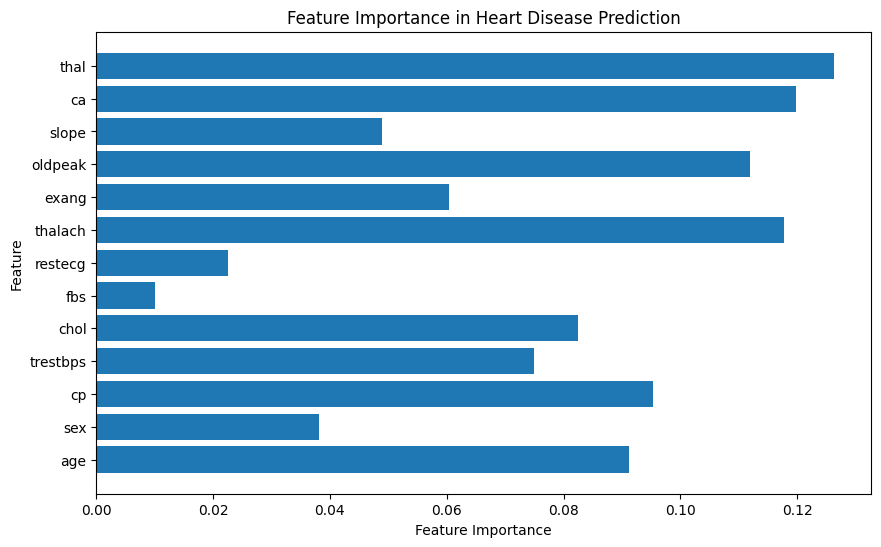

In [ ]:
# Feature importance visualization
import matplotlib.pyplot as plt

feature_importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Heart Disease Prediction')
plt.show()

In [ ]:
# Save test results to a CSV
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results_df.to_csv('test_results.csv', index=False)
print('Test results saved to test_results.csv')

Test results saved to test_results.csv
